In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/labels.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/labels.csv
/kaggle/input/description.md
/kaggle/input/GCP-Coupons-Instructions.rtf
/kaggle/input/sample_submission.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv
/kaggle/input/new-york-city-taxi-fare-prediction/description.md
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv.zip


In [3]:
import numpy as np 
import pandas as pd 
import os 

print(os.listdir('../input'))


['sample_submission.csv', 'test.csv.zip', 'train.csv.zip', 'labels.csv.zip', 'train.csv', 'test.csv', 'labels.csv', 'description.md', 'GCP-Coupons-Instructions.rtf', 'sample_submission.csv.zip', 'new-york-city-taxi-fare-prediction']


In [4]:
train_df =  pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_000)
test_df =  pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')
print('Training data size: %d' % len(train_df))
print('Test data size: %d' % len(test_df))


Training data size: 10000000
Test data size: 9914


In [5]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
train_df.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
# import seaborn as sns
# # გამოვთვალოთ რა დამოკიდებულება აქვს fair_amount-თან სხვადასხვა features
# correlation_matrix = train_df.corr()

# # ავაგოთ შესაბამისი გრაფი
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix[['fare_amount']], annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation between Features and Fare Amount')
# plt.show()


In [8]:
print(train_df.isnull().sum())


key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64


In [9]:
print(test_df.isnull().sum())


key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [10]:
train_df = train_df.dropna(how = 'any', axis = 'rows')
print(train_df.isnull().sum())


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999931e+06,9.999931e+06,9.999931e+06,9.999931e+06,9.999931e+06,9.999931e+06
mean,1.133849e+01,-7.250778e+01,3.991936e+01,-7.250897e+01,3.991913e+01,1.684805e+00
std,9.799845e+00,1.299413e+01,9.322519e+00,1.287532e+01,9.237280e+00,1.323421e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


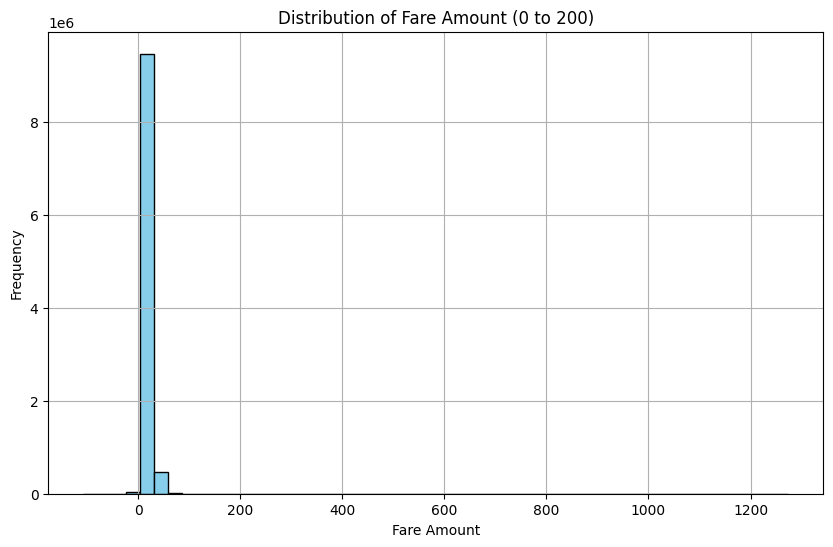

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train_df['fare_amount'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount (0 to 200)')
plt.grid(True)
plt.show()


In [13]:
train_df = train_df[train_df.fare_amount > 2.5]


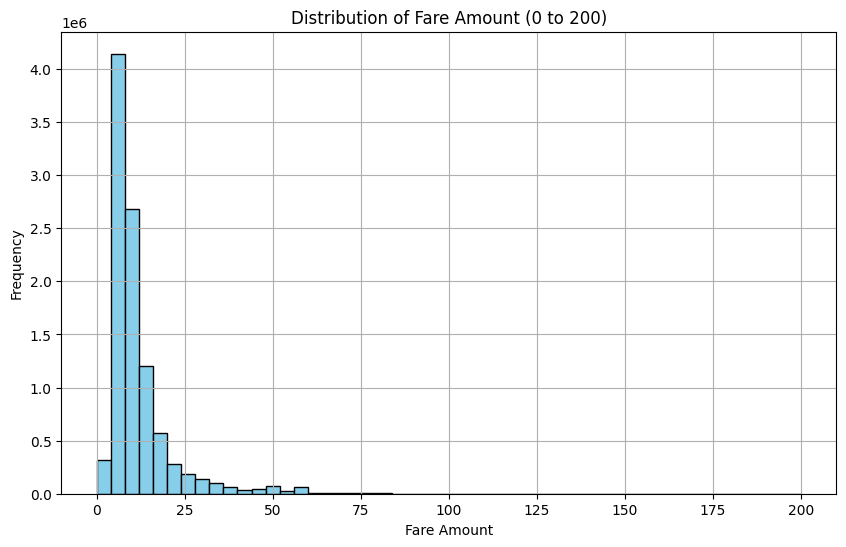

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['fare_amount'], bins=50, range=(0, 200), color='skyblue', edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount (0 to 200)')
plt.grid(True)
plt.show()


In [15]:
train_df['fare_amount'].max()  # მაქსიმალური და საშუალო რომ ვნახოთ შევაფასოთ საშუალოდ რა არის ხოლმე გადასახადი
train_df['fare_amount'].mean() 


11.376039855236192

In [16]:
passenger_counts = train_df['fare_amount'].value_counts()
fair_amount_mean = train_df['fare_amount'].mean()*30


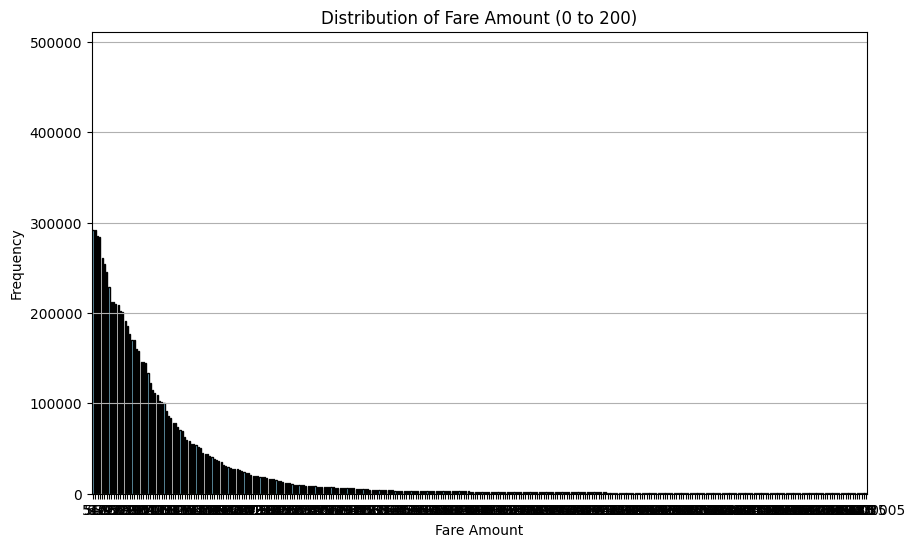

In [17]:
plt.figure(figsize=(10, 6))
passenger_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount (0 to 200)')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.xlim(2.5, fair_amount_mean)
plt.show()


In [18]:
train_df = train_df[train_df.fare_amount  fair_amount_mean]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3256393338.py, line 1)

In [19]:
pd.set_option('float_format', '{:f}'.format)
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9958290.000000,9958290.000000,9958290.000000,9958290.000000,9958290.000000,9958290.000000
mean,11.376040,-72.528046,39.930535,-72.538671,39.935497,1.685631
std,9.802259,12.948243,9.309369,12.802368,9.212693,1.323737
min,2.510000,-3439.245062,-3492.263768,-3426.600617,-3488.079513,0.000000
25%,6.000000,-73.992083,40.734951,-73.991400,40.734079,1.000000
50%,8.500000,-73.981828,40.752655,-73.980174,40.753188,1.000000
75%,12.500000,-73.967163,40.767143,-73.963757,40.768127,2.000000
max,1273.310000,3457.625683,3344.459268,3457.622350,3351.403027,208.000000


In [20]:
min(test_df.pickup_longitude.min(), test_df.dropoff_longitude.min()), \
max(test_df.pickup_longitude.max(), test_df.dropoff_longitude.max())


(-75.437729885051, 40.800715)

In [21]:
min(test_df.pickup_latitude.min(), test_df.dropoff_latitude.min()), \
max(test_df.pickup_latitude.max(), test_df.dropoff_latitude.max())


(-74.009507, 41.366138)

In [22]:
train_df = train_df.loc[train_df.pickup_latitude > 40.2]
train_df = train_df.loc[train_df.pickup_latitude  41.8]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (597950763.py, line 2)

In [23]:
train_df = train_df.loc[train_df.dropoff_latitude > 40.2]
train_df = train_df.loc[train_df.dropoff_latitude  41.8]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1813460319.py, line 2)

In [24]:
train_df = train_df.loc[train_df.dropoff_longitude  -72]
train_df = train_df.loc[train_df.dropoff_longitude > -74.5]


KeyError: "None of [Index([         -145.84161,         -145.979268,         -145.991242,\n               -145.991567,         -145.956655,         -145.972892,\n               -145.973802,         -145.990095,         -145.993078,\n                -145.99154,\n       ...\n               -145.982421,         -145.779863, -145.95197000000002,\n       -145.97207641601562,         -145.991845, -145.99329899999998,\n               -145.964967, -145.97344800000002, -145.96470499999998,\n               -145.998188],\n      dtype='float64', length=9958290)] are in the [index]"

In [25]:
train_df = train_df.loc[train_df.pickup_longitude  -72]
train_df = train_df.loc[train_df.pickup_longitude > -74.5]


KeyError: "None of [Index([        -145.844311,         -146.016048, -145.98273799999998,\n       -145.98712999999998,         -145.968095,         -146.000964,\n               -145.980002,           -145.9513,         -146.006462,\n               -145.980658,\n       ...\n       -145.97700500000002, -145.78185200000001, -145.95756699999998,\n       -145.98775482177734,         -146.001518,         -145.999464,\n               -145.968467,         -145.997952,           -145.9927,\n                -145.96539],\n      dtype='float64', length=9958290)] are in the [index]"

In [26]:
train_df.shape


(9958290, 8)

In [27]:
train_df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9958290.000000,9958290.000000,9958290.000000,9958290.000000,9958290.000000,9958290.000000
mean,11.376040,-72.528046,39.930535,-72.538671,39.935497,1.685631
std,9.802259,12.948243,9.309369,12.802368,9.212693,1.323737
min,2.510000,-3439.245062,-3492.263768,-3426.600617,-3488.079513,0.000000
25%,6.000000,-73.992083,40.734951,-73.991400,40.734079,1.000000
50%,8.500000,-73.981828,40.752655,-73.980174,40.753188,1.000000
75%,12.500000,-73.967163,40.767143,-73.963757,40.768127,2.000000
max,1273.310000,3457.625683,3344.459268,3457.622350,3351.403027,208.000000


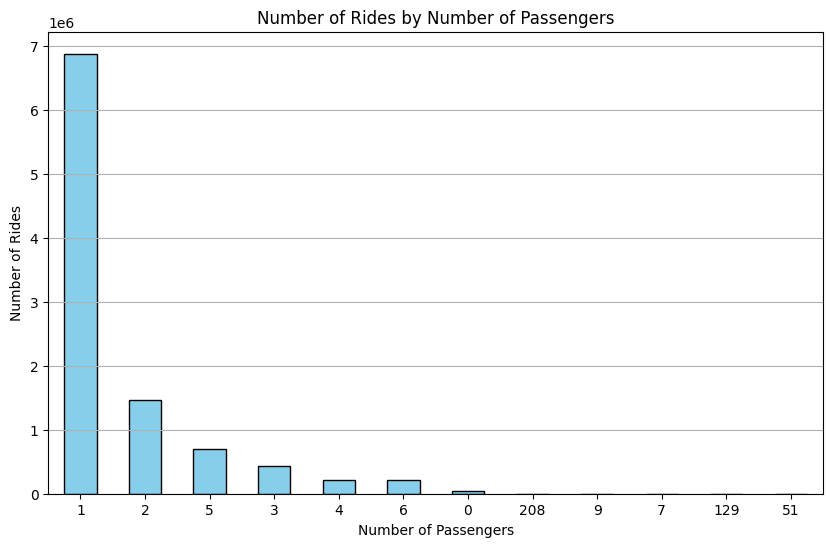

In [28]:
passenger_counts = train_df['passenger_count'].value_counts()

# Plot bar plot
plt.figure(figsize=(10, 6))
passenger_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Number of Passengers')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.grid(axis='y')  # Add gridlines to y-axis
plt.show()


In [29]:
train_df = train_df.loc[train_df.passenger_count > 0]
train_df = train_df.loc[train_df.passenger_count  7]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (145580143.py, line 2)

In [30]:
train_df.shape


(9958290, 8)

In [31]:
merged_df = pd.concat([train_df,test_df], axis = 0, sort=False)
merged_df


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
9909,2010-12-02 01:44:39.0000002,NaN,2010-12-02 01:44:39 UTC,-73.992667,40.734183,-73.995432,40.739215,4
9910,2010-06-07 16:17:38.0000003,NaN,2010-06-07 16:17:38 UTC,0.000000,0.000000,0.000000,0.000000,1
9911,2013-11-01 08:37:36.0000003,NaN,2013-11-01 08:37:36 UTC,-73.990315,40.746236,-73.991841,40.733516,1
9912,2011-05-03 10:14:00.000000123,NaN,2011-05-03 10:14:00 UTC,-73.956110,40.787588,-73.971877,40.765808,1


In [32]:
merged_df.shape


(9968204, 8)

In [33]:
merged_df.isna().sum()
# test_df.isna().sum()
# test_df.shape


key                     0
fare_amount          9914
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
dtype: int64

In [34]:
from haversine import haversine
def haversine_distance(row):
    pickup_coord = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coord = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup_coord, dropoff_coord)

merged_df['haversine_distance'] = merged_df.apply(haversine_distance, axis=1)


ValueError: Latitude 401.083332 is out of range [-90, 90]

In [35]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()


merged_df['pickup_datetime'] = pd.to_datetime(merged_df['pickup_datetime']).dt.tz_localize(None)
holidays = [holiday.replace(tzinfo=None) for holiday in holidays]  
holidays = pd.to_datetime(holidays, utc=True).tz_convert(merged_df['pickup_datetime'].dt.tz) 

# train_df['pickup_datetime'] = pd.to_datetime( train_df['pickup_datetime'])
merged_df['is_holiday'] = merged_df['pickup_datetime'].isin(holidays).astype(int)
num_holidays = (merged_df['is_holiday'] == 1).sum()
print("Number of holiday rows:", num_holidays)


Number of holiday rows: 76


In [36]:
date_feature = merged_df['pickup_datetime']
year = date_feature.dt.year
month = date_feature.dt.month
day = date_feature.dt.day
hour = date_feature.dt.hour
minute = date_feature.dt.minute
second = date_feature.dt.second
merged_df['year'] = year
merged_df['month'] = month
merged_df['day'] = day
merged_df['hour'] = hour
merged_df['minute'] = minute
merged_df['second'] = second


In [37]:
merged_df.drop(['pickup_datetime'], axis = 1, inplace = True)


In [38]:
until = train_df.shape[0]
train = merged_df.iloc[0:until, :]
test = merged_df.iloc[until:, :] 
test.drop('fare_amount', axis = 1, inplace = True) 


/tmp/ipykernel_8/1590880167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('fare_amount', axis = 1, inplace = True)


In [39]:
train.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_holiday,year,month,day,hour,minute,second
0,2009-06-15 17:26:21.0000001,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,0,2009,6,15,17,26,21
1,2010-01-05 16:52:16.0000002,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,0,2010,1,5,16,52,16
2,2011-08-18 00:35:00.00000049,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,0,2011,8,18,0,35,0
3,2012-04-21 04:30:42.0000001,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,0,2012,4,21,4,30,42
4,2010-03-09 07:51:00.000000135,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,0,2010,3,9,7,51,0


In [40]:
test.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_holiday,year,month,day,hour,minute,second
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0,2010,10,1,21,26,11
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0,2013,10,6,1,38,0
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0,2012,3,30,19,13,53
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0,2012,2,8,2,57,23
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0,2013,12,13,22,56,0


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost


In [42]:
# import seaborn as sns
# # გამოვთვალოთ რა დამოკიდებულება აქვს fair_amount-თან სხვადასხვა features
# correlation_matrix = train.corr()

# # ავაგოთ შესაბამისი გრაფი
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix[['fare_amount']], annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation between Features and Fare Amount')
# plt.show()


In [43]:
target=train['fare_amount']


In [44]:
x_train, x_valid , y_train, y_valid = train_test_split(train, target, test_size=.2, random_state=0)

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape


((7966632, 14), (7966632,), (1991658, 14), (1991658,))

In [45]:
train.isna().sum()


key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
is_holiday           0
year                 0
month                0
day                  0
hour                 0
minute               0
second               0
dtype: int64

In [46]:
# target.shape
# x_train.shape


In [47]:
target = x_train['fare_amount']
x_train = x_train.drop(['fare_amount'], axis = 1)


In [48]:
# target = target.dropna(how = 'any', axis = 'rows')
# target.isnull().sum()
# x_train.isna().sum()


In [49]:
test_keys = test['key']
x_train.drop(['key'], axis = 1, inplace=True)


In [50]:
test_keys.head()


0      2010-10-01 21:26:11.0000001
1     2013-10-06 01:38:00.00000083
2      2012-03-30 19:13:53.0000001
3      2012-02-08 02:57:23.0000001
4    2013-12-13 22:56:00.000000237
Name: key, dtype: object

In [51]:
test_x = test
test_x.drop(['key'], axis= 1, inplace=True)


/tmp/ipykernel_8/1690976931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.drop(['key'], axis= 1, inplace=True)


In [52]:
# train_y = train.fare_amount
# x_train = x_train.drop(['fare_amount'], axis = 1)

model = LinearRegression()
model.fit(x_train, target)

# # Make prediction
y_pred = model.predict(test_x)


In [53]:
submission = pd.DataFrame(
    {'key': test_keys, 'fare_amount': y_pred},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))


['submission.csv', 'new-york-city-taxi-fare-prediction', 'new-york-city-taxi-fare-prediction_mariamjavakhishvili_nyc-taxi-fare_v2_C1.ipynb']


In [54]:
model.coef_


array([ 2.90398523e-03, -1.41887124e-04,  5.13923897e-03, -3.11170155e-03,
        7.70696855e-02, -7.24474994e-01,  6.37889274e-01,  1.08354303e-01,
        4.05230958e-03, -2.73239353e-02, -3.71646183e-03, -3.75314959e-03])

In [55]:
expected_valid = x_valid['fare_amount']
expected_valid


4068693    6.100000
8107599    9.500000
2222695    2.900000
6489021   10.100000
4406459    8.000000
             ...   
2694882   28.000000
9517217    6.500000
3387546   21.000000
5554010    8.900000
4427776    5.000000
Name: fare_amount, Length: 1991658, dtype: float64

In [56]:
x_valid.drop(['fare_amount'], axis=1, inplace=True)
x_valid.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_holiday,year,month,day,hour,minute,second
4068693,2009-02-12 15:58:49.0000002,-73.951492,40.770019,-73.968756,40.770146,1,0,2009,2,12,15,58,49
8107599,2012-12-10 12:37:00.00000020,-73.993765,40.720365,-73.988192,40.738845,6,0,2012,12,10,12,37,0
2222695,2010-06-24 15:34:00.000000175,-73.979227,40.756150,-73.981972,40.754148,1,0,2010,6,24,15,34,0
6489021,2012-01-01 15:41:40.0000001,-73.986577,40.730153,-74.004268,40.707432,3,0,2012,1,1,15,41,40
4406459,2013-12-18 20:29:00.000000100,-73.981325,40.733092,-73.963640,40.757342,2,0,2013,12,18,20,29,0


In [57]:
# valid_pred = model.predict(x_valid)


In [58]:
# mse = mean_squared_error(expected_valid, valid_pred)
# print("MSE  --> ", mse)


In [59]:
# import math
# rmse = math.sqrt(mse)
# print("RMSE  --> ", rmse)


In [60]:
# plt.scatter(expected_valid, valid_pred)
# plt.xlabel("Actual")
# plt.ylabel("Predicted")


In [61]:
# import seaborn as sns
# sns.regplot(x=expected_valid, y=valid_pred, ci=None, color='purple')


In [62]:
# new_train = x_train
# new_train.drop(['passenger_count', 'second', 'minute', 'day', 'hour', 'month', 'year'], axis=1, inplace=True)


In [63]:
# new_train.drop(['dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)


In [64]:
# new_valid = x_valid
# new_valid.drop(['passenger_count', 'second', 'minute', 'day', 'hour', 'month', 'year'], axis=1, inplace=True)


In [65]:
# new_valid.drop(['dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)


In [66]:
# new_model = LinearRegression()
# model.fit(new_train, target)

# # # Make prediction
# new_pred = model.predict(new_valid)
# display(new_pred)


In [67]:
# mse = mean_squared_error(expected_valid, valid_pred)
# print("MSE  --> ", mse)
# rmse = math.sqrt(mse)
# print("RMSE  --> ", rmse)
# plt.scatter(expected_valid, new_pred)
# plt.xlabel("Actual")
# plt.ylabel("Predicted")


In [68]:
# new_pred.mean()
# train_df.mean()


In [69]:
# expected_valid.head()


In [70]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# import xgboost


In [71]:
# sc = StandardScaler()
# train_scaled = sc.fit_transform(train_df)
# train_scaled[:5]


In [72]:
# train_df.head()


In [73]:
# new_train_scaled = pd.DataFrame(train_scaled, columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'is_holiday', 'year', 'month', 'day', 'hour', 'minute', 'second', 'haversine_distance'])
# new_train_scaled.to_csv('.//scaled_train_df.csv', index=False )


In [74]:
# x_train, x_valid , y_train, y_valid = train_test_split(train_df, target, test_size=.2)

# x_train.shape, y_train.shape, x_valid.shape, y_valid.shape


In [75]:
# from sklearn.linear_model import LinearRegression


In [76]:
# (w, _, _, _) = np.linalg.lstsq(x_train, y_train, rcond = None)
# print(w)


In [77]:
# w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_train.T, x_train)), x_train.T), y_train)
# print(w_OLS)


In [78]:
# test_df.head()


In [79]:
# test_df['year'].min() 
# test_df['year'].max()


In [80]:
# cal = USFederalHolidayCalendar()
# holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()


# test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime']).dt.tz_localize(None)
# holidays = [holiday.replace(tzinfo=None) for holiday in holidays]  
# holidays = pd.to_datetime(holidays, utc=True).tz_convert(test_df['pickup_datetime'].dt.tz) 

# # train_df['pickup_datetime'] = pd.to_datetime( train_df['pickup_datetime'])
# test_df['is_holiday'] = test_df['pickup_datetime'].isin(holidays).astype(int)
# num_holidays = (test_df['is_holiday'] == 1).sum()
# print("Number of holiday rows:", num_holidays)


In [81]:
# test_date_feature = test_df['pickup_datetime']
# year = test_date_feature.dt.year
# month = test_date_feature.dt.month
# day = test_date_feature.dt.day
# hour = test_date_feature.dt.hour
# minute = test_date_feature.dt.minute
# second = test_date_feature.dt.second
# test_df['year'] = year
# test_df['month'] = month
# test_df['day'] = day
# test_df['hour'] = hour
# test_df['minute'] = minute
# test_df['second'] = second


In [82]:
# target_t = test_df['key']


In [83]:
# test_df.drop(['key'], axis=1, inplace=True)


In [84]:
# test_df.drop([ 'pickup_datetime'], axis = 1, inplace=True)


In [85]:
# test_df['haversine_distance'] = test_df.apply(haversine_distance, axis=1)


In [86]:
# sc = StandardScaler()
# test_scaled = sc.transform(test_df)
# test_scaled[:5]
